In [18]:
# pip install keras_tuner pandas tensorflow scikit-learn distutils-pytest matplotlib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
data = pd.read_csv("scraped_questionsfv.csv")
print(data.info())
data=data.drop_duplicates()
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7008 entries, 6529 to 4696
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6275 non-null   float64
 1   question    7008 non-null   object 
 2   personal    7008 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 219.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6256 entries, 6529 to 4696
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6256 non-null   float64
 1   question    6256 non-null   object 
 2   personal    6256 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 195.5+ KB
None


finalistion du preprocesing du data en eliminant les pints d'interogation

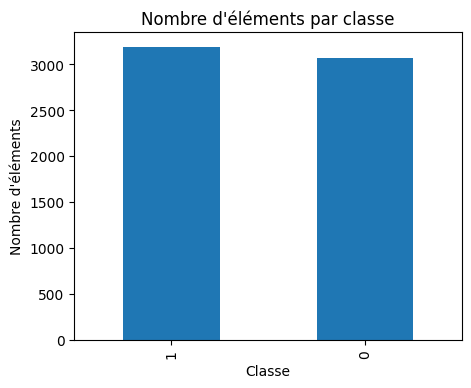

In [19]:
efectifs = data["personal"].value_counts()
plt.figure(figsize=(5, 4))
efectifs.plot(kind='bar')
plt.title('Nombre d\'éléments par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'éléments')

plt.show()

on remarque que notre data est bien partitionée entre les deux classes

In [20]:
data['question'] = data['question'].str.replace('?', ' ', regex=False)

In [21]:
data

,Unnamed: 0,question,personal
6529,48280.0,How do you handle moments when things don’t go...,1
670,878.0,How easy it is to make you fall for someone,1
2446,2339.0,How do you build a successful career,1
4354,1062.0,How different are you from your family,1
6933,88685.0,How do you manage your emotions in high-pressu...,1
...,...,...,...
4243,1035.0,What animal is on Levi’s logo,0
2109,2095.0,What is the scientific term for the study of s...,0
1712,483.0,What is the worst compliment you have ever rec...,1
4686,3144.0,Where can I find a bus schedule,0


division des donnés entre les donnés d'entrainement et les données de test:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data["question"],data["personal"], test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5004,)
(1252,)
(5004,)
(1252,)


In [24]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)
X_train , X_test

(array([[  0,   0,   0, ..., 476,  27, 117],
        [  0,   0,   0, ..., 141,   5, 315],
        [  0,   0,   0, ...,  59, 164, 165],
        ...,
        [  0,   0,   0, ..., 249, 222, 173],
        [  0,   0,   0, ...,  20, 388, 168],
        [  0,   0,   0, ..., 292,   8, 798]], dtype=int32),
 array([[   0,    0,    0, ...,  113,    5,   97],
        [   0,    0,    0, ...,   75,   26, 1215],
        [   0,    0,    0, ...,   40,  447,  124],
        ...,
        [   0,    0,    0, ...,  488,   10,  147],
        [   0,    0,    0, ...,   46,   10,  676],
        [   0,    0,    0, ...,    1, 2147,  316]], dtype=int32))

In [25]:
print(y_train)
type(y_train)

1037    1
3757    0
6348    1
240     1
5619    1
       ..
5354    0
579     0
6512    1
3537    1
2574    1
Name: personal, Length: 5004, dtype: int64


pandas.core.series.Series

construire le model:

In [26]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/home/natsu/Desktop/mohamed projet/.env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

compiler le miodel:

In [28]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
# Convert type to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Ensure the dtype is correct
y_train = y_train.astype('int')
y_test = y_test.astype('int')
# Convert to a TensorFlow tensor
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [30]:
# Training the model while saving metric statistics
history=model.fit(X_train, y_train, epochs=35, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.5985 - loss: 0.6908 - val_accuracy: 0.7540 - val_loss: 0.6823
Epoch 2/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7779 - loss: 0.6776 - val_accuracy: 0.8586 - val_loss: 0.6572
Epoch 3/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8619 - loss: 0.6430 - val_accuracy: 0.8682 - val_loss: 0.5811
Epoch 4/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8686 - loss: 0.5550 - val_accuracy: 0.8874 - val_loss: 0.4744
Epoch 5/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8868 - loss: 0.4557 - val_accuracy: 0.8826 - val_loss: 0.3877
Epoch 6/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8950 - loss: 0.3693 - val_accuracy: 0.9042 - val_loss: 0.3176
Epoch 7/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9008 - loss: 0.3061 - val_accuracy: 0.9121 - val_loss: 0.2728
Epoch 8/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9245 - loss: 0.2572 - 

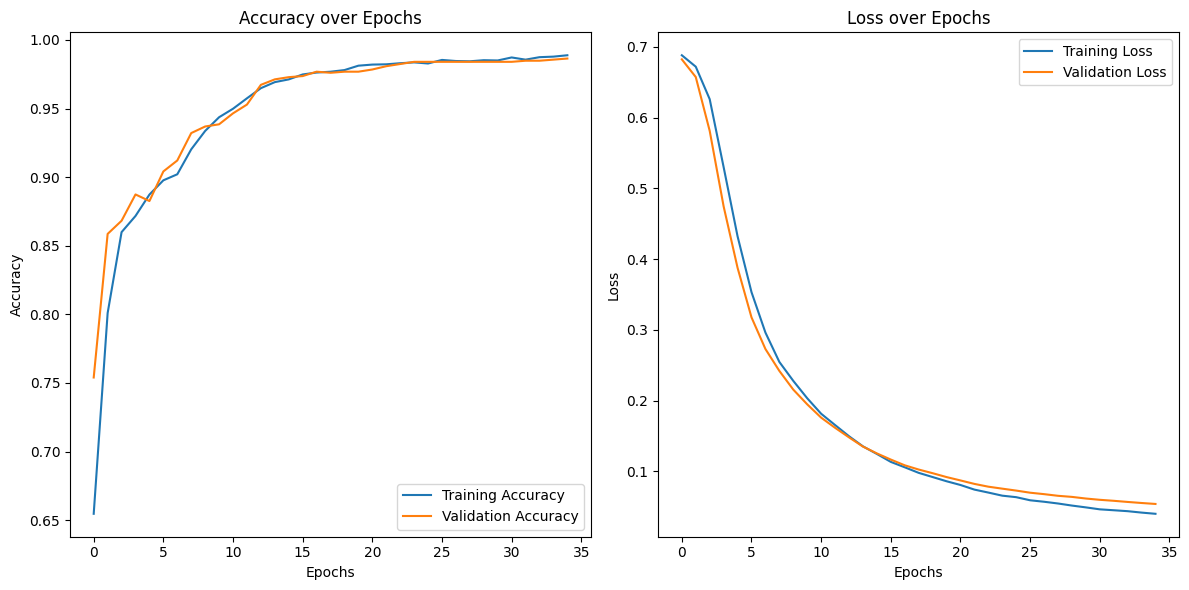

In [31]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9939 - loss: 0.0358
Test Loss: 0.053771406412124634
Test Accuracy: 0.9864217042922974


### enregistrer le model lstm dans un fichier de forma keras pour l'utiliser ultérieurement dans notre application Flask avec le tokenizer

In [33]:
model.save("lstm_model.keras")

### enregistrer le tokenizer de cette dataset pour l'usage ulterieur avec le model

In [ ]:
import pickle

with open("lstm_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [69]:
import numpy as np
predictions = model.predict(X_test)
y_pred = np.array([1 if i>=0.5 else 0 for i in predictions])
y_pred = tf.convert_to_tensor(y_pred)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9864217252396166

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       595
           1       0.99      0.98      0.99       657

    accuracy                           0.99      1252
   macro avg       0.99      0.99      0.99      1252
weighted avg       0.99      0.99      0.99      1252



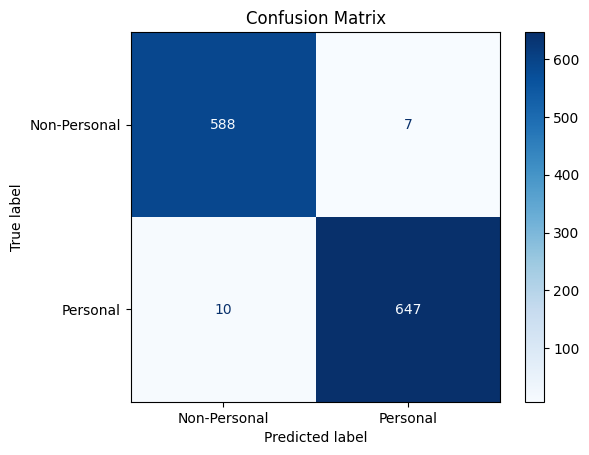

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Personal', 'Personal'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [34]:
# Defining a function for prediction
def predict_question(question):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([question])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  result = "personal" if prediction[0][0] > 0.5 else "not personal"
  return result

In [ ]:
# Trying the model with an example question
new_review = "what's the bayes theorem?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
this question is: not personal


In [37]:
# Trying a harder one
new_review = "what's your opinion about what is hapening in palestine"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
this question is: personal


In [39]:
new_review = "how much can you process at once?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
this question is: personal


In [39]:
# Non personal question
new_review = "Haven't you imagined one day how real life will be"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
this question is: personal


In [ ]:
#would you rather stay without food 5 days or without water 2 days
#what's your opinion about what is hapening in palestine
#what's the bayes theorem
#what's the meaning of accuracy